# CNN实现跌倒检测

In [2]:
import os
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms,datasets
import shutil
from torch.nn import init
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time 

In [3]:
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])  ])

In [4]:
train_dataset=datasets.ImageFolder('C:/Users/Desktop/20230511_code/URFD_images/data/train',transform=transform)
val_dataset=datasets.ImageFolder('C:/Users/Desktop/20230511_code/URFD_images/data/val',transform=transform)
test_dataset=datasets.ImageFolder('C:/Users/Desktop/20230511_code/URFD_images/data/test',transform=transform)

In [5]:
batch_size=100
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

In [6]:
class MyConvModule(torch.nn.Module):
    def __init__(self):
        super(MyConvModule,self).__init__()
        self.conv1=torch.nn.Sequential(torch.nn.Conv2d(in_channels=3,out_channels=32,kernel_size=11),
                                     torch.nn.BatchNorm2d(32),
                                     torch.nn.ReLU(inplace=True))
        self.maxpool=torch.nn.MaxPool2d(10, 4)
        self.fc1=torch.nn.Linear(32*52*52,1024)
        self.fc2=torch.nn.Linear(1024,512)
        self.fc3=torch.nn.Linear(512,2)
        
    def forward(self,X):
        X=self.conv1(X)
        X=self.maxpool(X)
        X=X.view(-1,32*52*52)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        return X

In [7]:
def train(net,data_loader):
    net.train()
    train_batch_num=len(data_loader)
    total_loss=0
    correct=0
    sample_num=0
    for batch_idx,(data,target) in enumerate(data_loader):
        optimizer.zero_grad()
        output=net(data)
        loss=criterion(output,target)
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        prediction=torch.argmax(output,1)
        correct+=(prediction==target).sum().item()
        sample_num+=len(prediction)
    loss=total_loss/train_batch_num
    acc=correct/sample_num
    return loss,acc

In [8]:
def test(net,data_loader):
    net.eval()
    test_batch_num=len(data_loader)
    total_loss=0
    correct=0
    sample_num=0
    for batch_idx,(data,target) in enumerate(data_loader):
        output=net(data)
        loss=criterion(output,target)
        total_loss+=loss.item()
        prediction=torch.argmax(output,1)
        correct+=(prediction==target).sum().item()
        sample_num+=len(prediction)
    loss=total_loss/test_batch_num
    acc=correct/sample_num
    return loss,acc

In [9]:
net=MyConvModule()
print(net)
optimizer = torch.optim.Adam(net.parameters(), lr=5e-6)
criterion=torch.nn.CrossEntropyLoss()

MyConvModule(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(11, 11), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=10, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=86528, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)


In [10]:
epoch=20
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
test_loss_list=[]
test_acc_list=[]
since=time.time()
for epoch in range(epoch):
    train_loss,train_acc=train(net,train_loader)
    val_loss,val_acc=test(net,val_loader)
    test_loss,test_acc=test(net,test_loader)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"epoch: {epoch} \t train_loss: {train_loss:.4f}\t"
          f" train_acc: {train_acc}\t"
          f" val_loss: {val_loss:.4f}\t val_acc:{val_acc}"
          f" test_loss: {test_loss:.4f}\t test_acc:{test_acc}")
time_elapsed=(time.time()-since)/60

epoch: 0 	 train_loss: 0.6474	 train_acc: 0.7142857142857143	 val_loss: 0.6586	 val_acc:0.5555555555555556 test_loss: 0.6525	 test_acc:0.5813953488372093
epoch: 1 	 train_loss: 0.5523	 train_acc: 0.7142857142857143	 val_loss: 0.6168	 val_acc:0.5555555555555556 test_loss: 0.6098	 test_acc:0.5813953488372093
epoch: 2 	 train_loss: 0.4903	 train_acc: 0.7142857142857143	 val_loss: 0.5708	 val_acc:0.5555555555555556 test_loss: 0.5641	 test_acc:0.5813953488372093
epoch: 3 	 train_loss: 0.4357	 train_acc: 0.7142857142857143	 val_loss: 0.5268	 val_acc:0.8666666666666667 test_loss: 0.5205	 test_acc:0.8604651162790697
epoch: 4 	 train_loss: 0.4106	 train_acc: 0.8877551020408163	 val_loss: 0.4905	 val_acc:0.9777777777777777 test_loss: 0.4837	 test_acc:0.9534883720930233
epoch: 5 	 train_loss: 0.3873	 train_acc: 0.9183673469387755	 val_loss: 0.4654	 val_acc:0.8666666666666667 test_loss: 0.4573	 test_acc:0.8604651162790697
epoch: 6 	 train_loss: 0.3591	 train_acc: 0.8775510204081632	 val_loss: 0.44

In [11]:
time_elapsed

1.6712857802708945

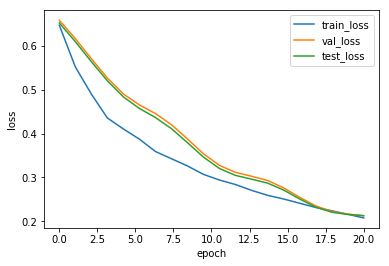

In [12]:
x=np.linspace(0,len(train_loss_list),len(test_loss_list))
plt.plot(x,train_loss_list,label="train_loss",linewidth=1.5)
plt.plot(x,val_loss_list,label="val_loss",linewidth=1.5)
plt.plot(x,test_loss_list,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

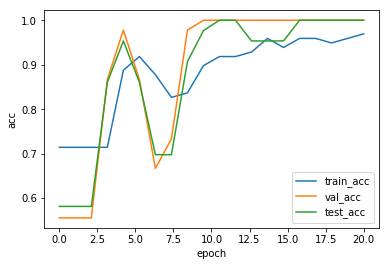

In [13]:
x=np.linspace(0,len(train_acc_list),len(test_acc_list))
plt.plot(x,train_acc_list,label="train_acc",linewidth=1.5)
plt.plot(x,val_acc_list,label="val_acc",linewidth=1.5)
plt.plot(x,test_acc_list,label="test_acc",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()